In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
incidents = pd.read_feather("incidents.feather")
drivers = pd.read_feather("drivers.feather")
non_motorists = pd.read_feather("non_motorists.feather")
combo = pd.read_feather("combo.feather")

C:\ProgramData\Anaconda3\envs\main_env\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
incident_locations = incidents.loc[incidents['not_in_county'] == 0,['latitude', 'longitude']]

In [4]:
X = StandardScaler().fit_transform(incident_locations)

In [31]:
db = DBSCAN(eps=0.25, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Silhouette Coefficient: 0.357


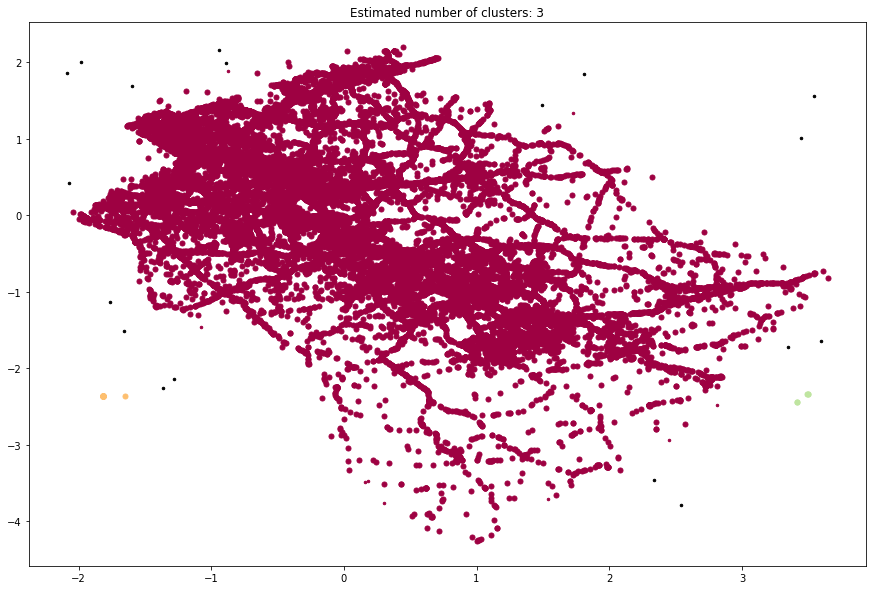

In [32]:
fig, ax = plt.subplots(figsize = (15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col), markeredgecolor=tuple(col),markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col), markeredgecolor=tuple(col), markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()